In [1]:
from __future__ import print_function, division

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import numpy as np
import math

import pandas as pd
import xarray as xr

import util
import ram_model
import plotting

# Import Data

In [3]:
output_rat = pd.read_csv('output_rat.csv', header=None, index_col=0, squeeze=True)
output_rt = pd.read_csv('output_rt.csv')

In [ ]:
results_rat = pd.read_csv('output_rat.csv', header=None, index_col=0, squeeze=True).to_dict()
results_rt = pd.read_csv('output_rt.csv', header=None, index_col=0, squeeze=True).to_dict()


# Output (initial and over time)

In [11]:
###create a dict of output names and the z bounds they align with
output_dict = {}
output_dict['bounds'] = {'Tatm':'z','TdotLW_clr':'z', 'LW_flux_up_clr':'z_bounds', 
               'LW_flux_down_clr':'z_bounds', 'LW_flux_net_clr':'z_bounds', 
               'TdotSW_clr':'z', 'SW_flux_up_clr':'z_bounds', 
               'SW_flux_down_clr':'z_bounds', 'SW_flux_net_clr':'z_bounds',
               'theta_init':'z', 'theta':'z', 'dtheta_dz':'z_bounds', 'atm_diffk':'z_bounds', 
               'atm_turbulent_flux':'z_bounds','turb_atm_hr':'z', 
               'turb_hr':'z', 'advection_Tatm':'z'}
atm_process_dict = {'Tatm':'Atmospheric Temperature (K)',
                    'atm_diffk':r'Atmospheric $\kappa$ ($\frac{m^2}{s}$)',
                    'dtheta_dz':r'$\frac{d\theta}{dz}$ ($\frac{K}{m}$)',
                    'theta':r'$\theta$',
                    'SW_flux_net_clr':r'Shortwave Flux ($\frac{W}{m^2}$)',
                    'LW_flux_net_clr':r'Longwave Flux ($\frac{W}{m^2}$)', 
                    'TdotLW_clr':r'Longwave Heating Rate ($\frac{K}{s}$)',
                    'TdotSW_clr':r'Shortwave Heating Rate ($\frac{K}{s}$)',
                    'turb_atm_hr':r'Turbulent Heating Rate ($\frac{K}{s}$)',
                    'advection_Tatm':r'Advective Heating Rate ($\frac{K}{s}$)',
                   'atm_turbulent_flux':'Turbulent Flux'}
single_level_process = {'LW_sfc_clr':r'Surface Longwave Flux ($\frac{W}{m^2}$)', 
                        'Ts': 'Surface Temperature (K)', 
                        'ASRclr':r'Absorbed Solar Radiation, ($\frac{W}{m^2}$)', 
                        'SW_sfc_clr':r'Surface Shortwave Flux ($\frac{W}{m^2}$)', 
                        'total_sfc_flux':r'Total Surface Flux ($\frac{W}{m^2}$)', 
                        'dtheta_dz_near_surf_init':r'$\frac{d\theta}{dz}$ ($\frac{K}{m}$)', 
                        'surface_diffk':r'Surface $\kappa$ ($\frac{m^2}{s}$)', 
                        'sfc_turbulent_flux':r'Surface Turbulent Flux ($\frac{W}{m^2}$)', 
                        'turb_sfc_hr':r'Surface Turbulent Heating Rate ($\frac{K}{s}$)', 
                        'advection_Ts':r'Surface Advection ($\frac{K}{s}$)', 
                        'OLR':r'Outgoing Longwave Radiation ($\frac{W}{m^2}$)'}

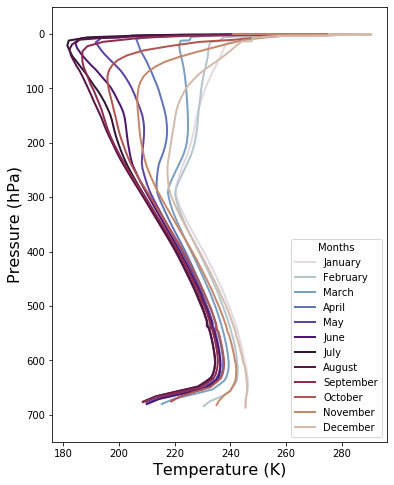

In [12]:
#### plot temperature profiles
plotting.plot_temp(ds, results_dict)
#plt.savefig('../figures/initial_temperature_profiles.png', bbox_inches = 'tight', dpi = 150)


In [13]:
CO2_conc1 = .00038
CO2_conc2 = .00076
time = time7
fig, ax = plt.subplots(figsize = [6,8])
colors=iter(cm.twilight(np.linspace(0,1,8)))
for month in ['December','June', 'April','October']:
    c = next(colors)
    x1 = np.asarray(results_dict[time]['Tatm'][CO2_conc1][month])
    x1 = np.append(x1, results_dict[time]['Ts'][CO2_conc1][month])
    y1 = results_dict[0]['lev'][CO2_conc1][month]
    y1 = np.append(0., y1)
    x2 = np.asarray(results_dict[time]['Tatm'][CO2_conc2][month])
    x2 = np.append(x2, results_dict[time]['Ts'][CO2_conc2][month])
    y2 = results_dict[0]['lev'][0.00038][month]
    y2 = np.append(0., y2)
    plt.plot(x1, y1, c = c, lw = 4, label = month)
    plt.plot(x2, y2, c = c, lw = 4, label = month)

    #plt.tick_params(
    #    axis='x',          # changes apply to the x-axis
    #    which='both',      # both major and minor ticks are affected
    #    bottom=False,      # ticks along the bottom edge are off
     #   top=False,         # ticks along the top edge are off
     #   labelbottom=False)
    plt.ylabel('Pressure (hPa)', fontsize = 20)
    plt.xlabel('Temperature Change (K)', fontsize = 20)
    plt.ylim([750,-50])
   # plt.xlim([-4,4])
plt.grid()
plt.legend(bbox_to_anchor = [1.05, 1.])
#plt.savefig('../figures/june_dec_temp_equil.png', dpi = 150, bbox_inches = 'tight')

NameError: name 'time7' is not defined

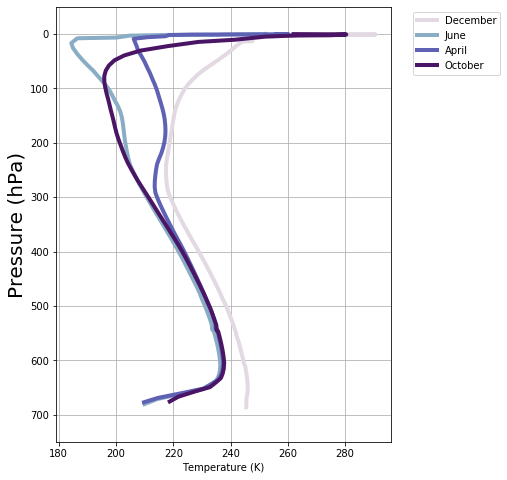

In [14]:
fig, ax = plt.subplots(figsize = [6,8])
colors=iter(cm.twilight(np.linspace(0,1,8)))
for month in ['December','June', 'April','October']:
    c = next(colors)
    x = np.asarray(results_dict[0]['Tatm'][0.00038][month])
    x = np.append(x, results_dict[0]['Ts'][0.00038][month])
    y = results_dict[0]['lev'][0.00038][month]
    y = np.append(0., y)
    plt.plot(x, y, c = c, lw = 4, label = month)
    plt.ylabel('Pressure (hPa)', fontsize = 20)
    plt.xlabel('Temperature (K)')
    plt.ylim([750,-50])
plt.grid()
plt.legend(bbox_to_anchor = [1.05, 1.])
#plt.savefig('../figures/june_dec_temp.png', dpi = 150, bbox_inches = 'tight')

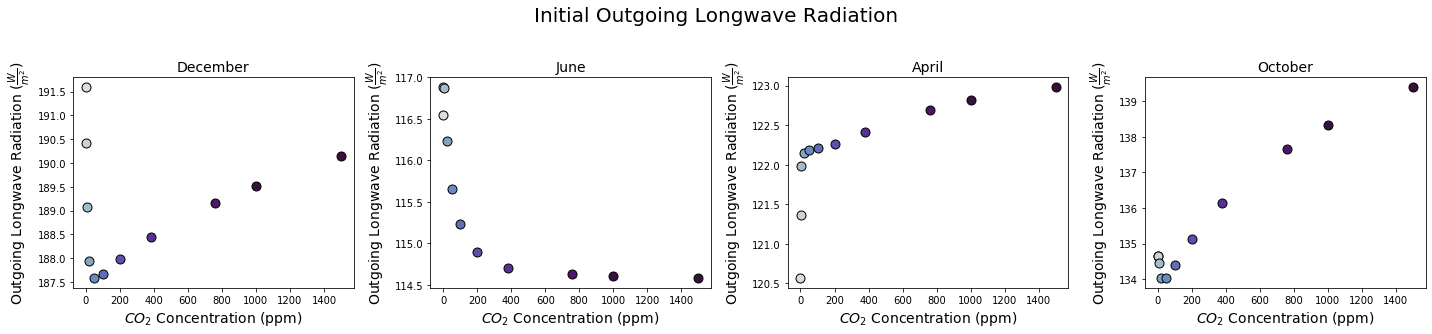

In [15]:
#### plot OLR
plotting.plot_sfc_TOA_process(ds, 4, results_dict, 'OLR', ['December','June', 'April','October'], single_level_process, [20,4])
plt.suptitle('Initial Outgoing Longwave Radiation', fontsize = 20, y = 1.15);
#plt.savefig('../figures/OLR_init.png', bbox_inches = 'tight', dpi = 150)

In [16]:


#### plot LW surface flux
plotting.plot_sfc_TOA_process(ds, results_dict, 'LW_sfc_clr', ['December','June'], single_level_process)
plt.suptitle('Initial Surface Net Longwave Flux', fontsize = 20, y = 1.15);
#plt.savefig('../figures/sfcLW_init.png', bbox_inches = 'tight', dpi = 150)

#### plot SW surface flux
plotting.plot_sfc_TOA_process(ds, results_dict, 'SW_sfc_clr', ['December','June'], single_level_process)
plt.suptitle('Initial Surface Net Shortwave Flux', fontsize = 20, y = 1.15);
#plt.savefig('../figures/sfcSW_init.png', bbox_inches = 'tight', dpi = 150)

#### plot initial Ts
plotting.plot_sfc_TOA_process(ds, results_dict, 'ASRclr', ['December','June'], single_level_process)
plt.suptitle('Initial Surface Temperature', fontsize = 20, y = 1.15);


TypeError: plot_sfc_TOA_process() missing 2 required positional arguments: 'single_level_process' and 'figsize'

### Calculate GHE

In [17]:
#GHE = SFC(lw,up) - OLR
GHE = {}
for m in np.asarray(ds['month']):
    GHE[m] = {}
    for CO2 in ds['CO2_list'].values:
        GHE[m][CO2] = {}
        GHE[m][CO2] = results_dict[0]['OLR'][0][m][-1] - results_dict[0]['OLR'][CO2][m]

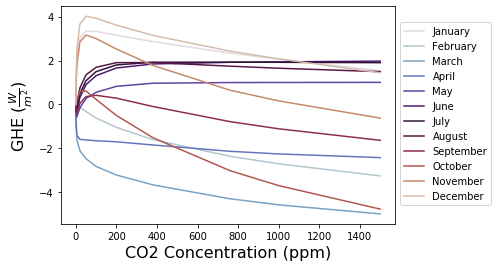

In [18]:
fig, ax = plt.subplots(figsize = [6,4])
color=iter(cm.twilight(np.linspace(0,1,13)))
for month in GHE.keys():
    c = next(color)
    plt.plot(np.asarray(list(GHE[month].keys()))*1e6, list(GHE[month].values()), c=c, label = month)
    plt.legend()
    plt.ylabel(r'GHE $(\frac{W}{m^2})$', fontsize = 16)
    plt.xlabel('CO2 Concentration (ppm)', fontsize = 16)
    plt.legend(bbox_to_anchor=(1.0, .95))
plt.savefig('../figures/GHE.png', bbox_inches = 'tight',dpi = 150)

### Timestep forward

In [19]:
steps = 3650
### results for each timestep
for i in range(steps):
    #step model forward
    results_dict[(i+1)*timestep] = {}
    for count, output in enumerate(output_list):
        results_dict[(i+1)*timestep][output] = {}
        for CO2 in ds['CO2_list'].values:
            results_dict[(i+1)*timestep][output][CO2] = {}
            for m in np.asarray(ds['month']):
                results_dict[(i+1)*timestep][output][CO2][m] = {}
                if count==0:
                    ram_dict[CO2][m].step_forward()
                #add outputs/diagnostics
                if output in (diagnostics_list):
                    results_dict[(i+1)*timestep][output][CO2][m] = (ram_dict[CO2][m].diagnostics[output])
                if output in temp_list:
                    results_dict[(i+1)*timestep][output][CO2][m] = list(ram_dict[CO2][m].state[output])
                if output in list(adv_dict.keys()):
                    results_dict[(i+1)*timestep][output][CO2][m] = list(ram_dict[CO2][m].subprocess.Advection.forcing_tendencies[adv_dict[output]])
                if output == 'lev_bounds':
                    results_dict[(i+1)*timestep][output][CO2][m] = list(ram_dict[CO2][m].lev_bounds)

##### Save our data

In [20]:
import csv

w = csv.writer(open("output_rat.csv", "w"))
for key, val in results_dict.items():
    w.writerow([key, val])

#### parameters for plots

In [20]:
###select CO2 concentrations and times to look at
CO2_conc1 = .00038
CO2_conc2 = .00076
time1 = (0)*timestep
time2 = 5*365*timestep
time3 = 8*365*timestep
time4 = 11*365*timestep
time5 = 14*365*timestep
time6 = 17*365*timestep
time7 = 20*365*timestep
month1 = 'December'
month2 = 'June'

#### CO2 difference plots

['atm_diffk','Tatm','dtheta_dz','theta','SW_flux_net_clr','LW_flux_net_clr','TdotLW_clr','TdotSW_clr','turb_atm_hr','advection_Tatm']

In [ ]:
plotting.plot_co2_dif(
        results_dict, 
        output = 'Tatm',
        output_dict = results_dict, month_list = ['December','June'], CO2_conc1 = CO2_conc1,CO2_conc2 = CO2_conc2, 
        time1 = time7,figsize = [8,4], rows =5, columns =2, ylim = 700, diff_only = True
    )
#plt.savefig(f'../figures/temp_evolution.png', bbox_inches = 'tight', dpi = 150)

#### time difference plots

['Tatm','atm_diffk','dtheta_dz','theta','SW_flux_net_clr','LW_flux_net_clr','TdotLW_clr','TdotSW_clr','turb_atm_hr','advection_Tatm', 'atm_turbulent_flux']:


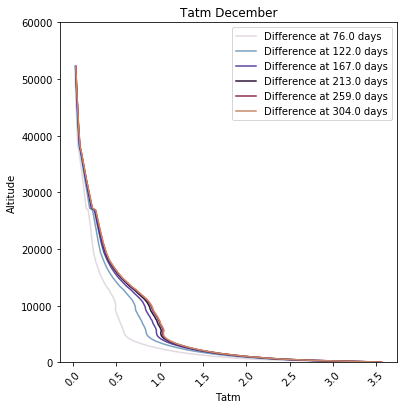

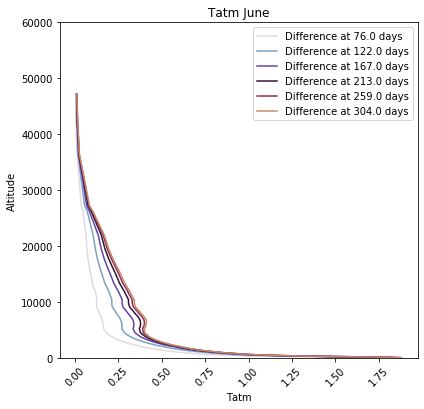

In [26]:
for output in ['Tatm']:
    for month in [month1, month2]:
        plotting.plot_time_dif(
            results_dict,
            output = output,
            output_dict = output_dict, CO2_conc1 = CO2_conc1, time1 = 0, timesteps = [time2, time3, time4, time5, time6, time7], month = month,
            figsize = [6,6], ylim = 60000, diff_only = True
                               )
        plt.title(f'{output} {month}')
#plt.savefig(f'../figures/{month}_time_dif_1000m.png', bbox_inches = 'tight', dpi = 150)

#### look at Tatm lowest level - Ts 

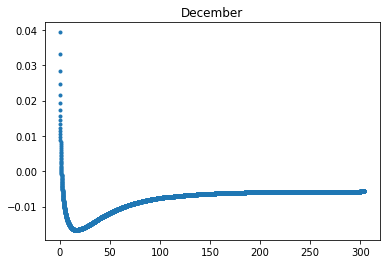

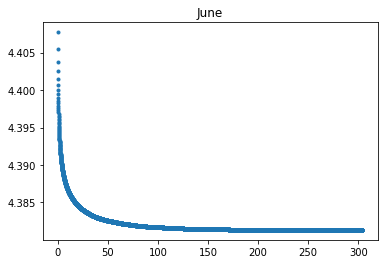

In [27]:
for month in [month1, month2]:
    fig, ax = plt.subplots()
    for idx, time in enumerate(range(0,steps*timestep, timestep)):
        plt.plot(np.round(idx*timestep/climlab.constants.seconds_per_day, 2), results_dict[time]['Tatm'][CO2_conc1][month][-1] - results_dict[time]['Ts'][CO2_conc1][month][-1], 'C0.')
    plt.title(f'{month}')

#### single level process plots: 

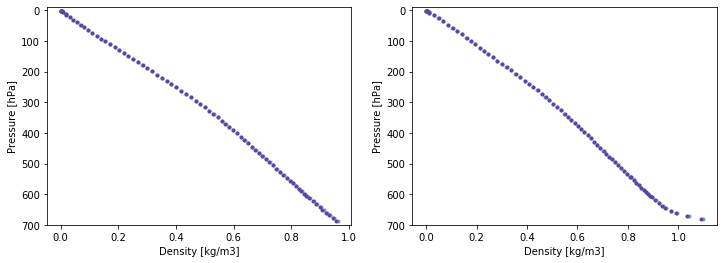

In [41]:
#### plot the density of the atmosphere (which is used to calculate the advective flux)
R = 8.314 #J/mol/K
MW_air = 0.0289647 #kg/mol
cp_air = 1003 #specific heat of air (at 250 K) J/(kg*K)


fig, axes = plt.subplots(1, len(month_list), figsize = figsize)
for idx_m, month in enumerate(month_list):
    ax = axes[idx_m]
    density_atm1 = (MW_air*100*ram_dict[CO2_conc1][month].lev)/(np.asarray(results_dict[t]['Tatm'][CO2_conc1][month]) * R) #kg/m^3
    pressure_TOA1 = ram_dict[CO2_conc1][month].lev #hPa
    ax.plot(density_atm1, pressure_TOA1, c = colors[1], marker = '.', linestyle = '')

    density_atm2 = (MW_air*100*ram_dict[CO2_conc2][month].lev)/(np.asarray(results_dict[t]['Tatm'][CO2_conc2][month]) * R) #kg/m^3
    pressure_TOA2 = ram_dict[CO2_conc2][month].lev #hPa
    ax.plot(density_atm2, pressure_TOA2, c = colors[2], marker = '.', linestyle = '')
    ax.set_ylim(700,-10)
    ax.set_ylabel('Pressure [hPa]')
    ax.set_xlabel('Density [kg/m3]')

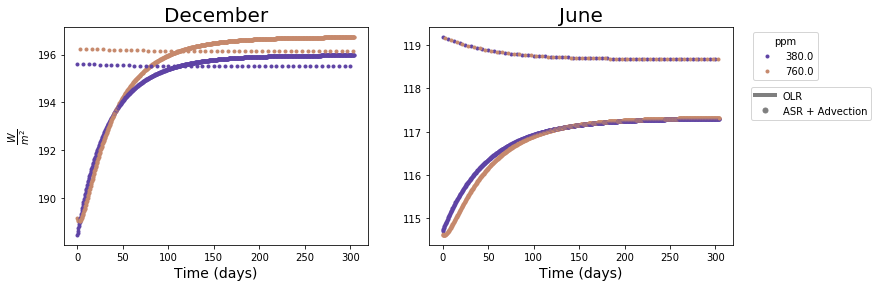

In [23]:
#### plot the advection+ ASR vs OLR
month_list = ['December','June']
figsize = [12,4]
fig, axes = plt.subplots(1, len(month_list), figsize = figsize)
colors = cm.twilight(np.linspace(0,1,7))
for idx_m, month in enumerate(month_list):
    ax = axes[idx_m]
    #plot the OLR
    for t in list(results_dict.keys())[0::10]:
            ax.plot(t / climlab.constants.seconds_per_day,results_dict[t]['OLR'][CO2_conc1][month], c = colors[2], marker = '.', linestyle = '')
            ax.plot(t / climlab.constants.seconds_per_day,results_dict[t]['OLR'][CO2_conc2][month], c = colors[5], marker = '.', linestyle = '')
    #plot the sum of advection and ASR
    for t in list(results_dict.keys())[0::150]:
        #advection
        pressure_TOA1 = 100*ram_dict[CO2_conc1][month].lev[-1] #pascal (kg/m/s2)
        density_atm1 = (MW_air*100*ram_dict[CO2_conc1][month].lev)/(np.asarray(results_dict[t]['Tatm'][CO2_conc1][month]) * R) #kg/m^3
        delta_z1 = np.diff(results_dict[t]['z_bounds'][CO2_conc1][month]) #surface to atmosphere #m
        heat_capacity_atm1 = density_atm1*cp_air
        total_adv_flux1 = np.asarray(results_dict[t]['advection_Tatm'][CO2_conc1][month]) * heat_capacity_atm1* delta_z1 #W/m2
        ADV1 = total_adv_flux1.sum()
        #ASR
        ASR1= results_dict[t]['ASR'][CO2_conc1][month]
        #plot
        ax.plot(t / climlab.constants.seconds_per_day,ASR1-ADV1, c = colors[2], marker = '.', linestyle = '')
    for t in list(results_dict.keys())[75::150]:
        #advection
        pressure_TOA2 = 100*ram_dict[CO2_conc1][month].lev[-1] #pascal (kg/m/s2)
        density_atm2 = (MW_air*100*ram_dict[CO2_conc1][month].lev)/(np.asarray(results_dict[t]['Tatm'][CO2_conc1][month]) * R) #kg/m^3
        delta_z2 = np.diff(results_dict[t]['z_bounds'][CO2_conc1][month]) #surface to atmosphere #m
        heat_capacity_atm2 = density_atm2*cp_air
        total_adv_flux2 = np.asarray(results_dict[t]['advection_Tatm'][CO2_conc2][month]) * heat_capacity_atm2 * delta_z2 #W/m2
        ADV2 = total_adv_flux2.sum()
        #ASR
        ASR2= results_dict[t]['ASR'][CO2_conc2][month]
        #plot
        ax.plot(t / climlab.constants.seconds_per_day,ASR2-ADV2, c = colors[5], marker = '.', linestyle = '')
    axes[idx_m].set_xlabel('Time (days)', fontsize = 14)
    axes[0].set_ylabel(r'$\frac{W}{m^2}$', fontsize = 14, wrap=True)
    axes[idx_m].set_title(month, fontsize = 20)
plt.legend([f'{CO2_conc1*(1e6)}',f'{CO2_conc2*(1e6)}'], title = 'ppm', bbox_to_anchor=(1.05, 1.0))

legend_elements = [Line2D([0], [0], lw=4, color = 'C7', label='OLR'),
                   Line2D([0], [0], marker='o', color = 'C7', label='ASR + Advection',
                           markersize=5, linestyle="None")]
leg = Legend(ax, handles=legend_elements, labels = ['OLR', 'ASR + Advection'], bbox_to_anchor=(1.47, .75))
ax.add_artist(leg);
#plt.savefig('../figures/ASR_OLR.png', bbox_inches = 'tight', dpi = 150)

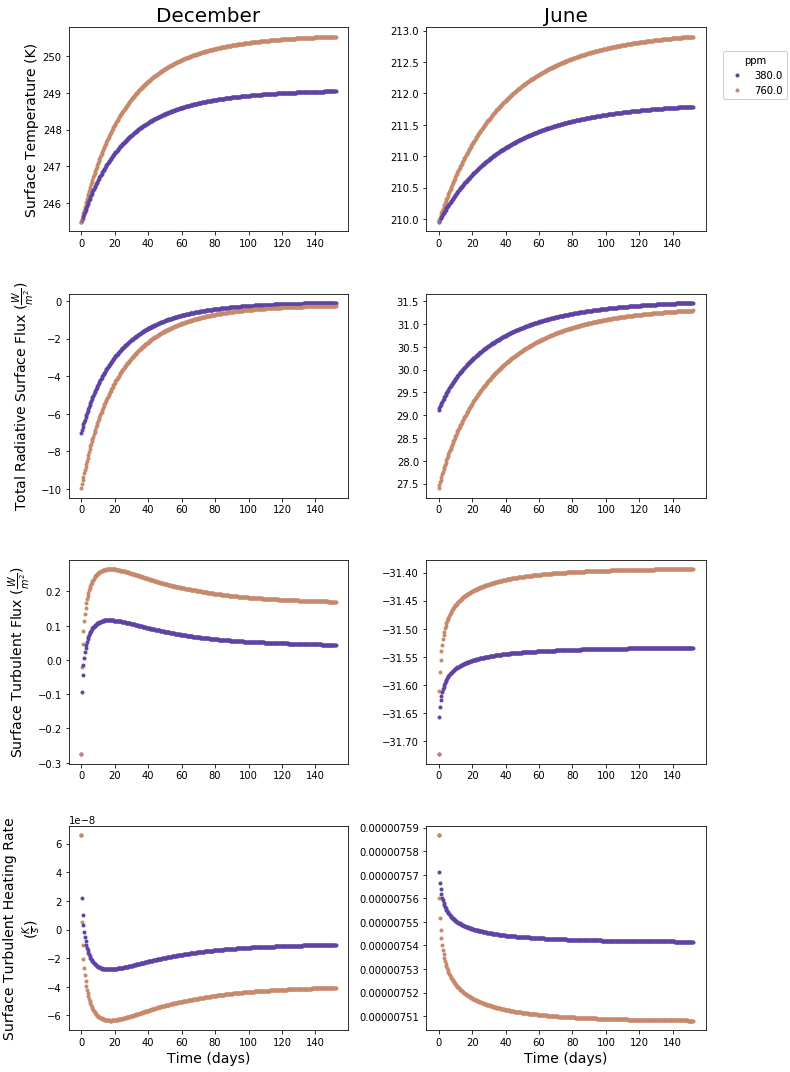

In [154]:
#### plot the surface processes
plotting.single_level_plot(results_dict,['Ts', 'total_sfc_flux', 'sfc_turbulent_flux', 'turb_sfc_hr'], 
                           CO2_conc1, CO2_conc2, [month1,month2], figsize = [10,15])
#plt.savefig(f'../figures/surface_processes.png', bbox_inches = 'tight', dpi = 150)
#### plot the surface radiative heating rate
plotting.rad_sfc_HR_plot(rad_sfc_HR,results_dict, .00038, .00076, ['December','June'], [10,4])

#### plot entire column (surface + atmosphere)

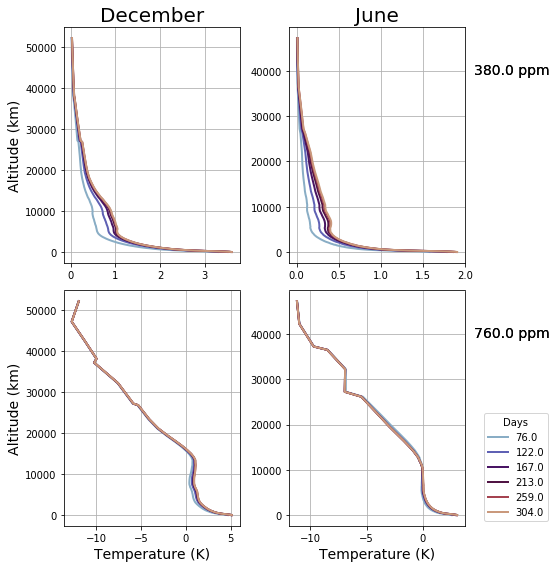

In [42]:
#### plot the temperature timestepped forward
plotting.plot_temp_timestepped(ds, results_dict, month1, month2, time1, [time2, time3, time4, time5, time6, time7], 
                               ylim = 60000, diff_only = True)
#plt.savefig('../figures/temp_evolution.png', bbox_inches = 'tight',dpi = 150)


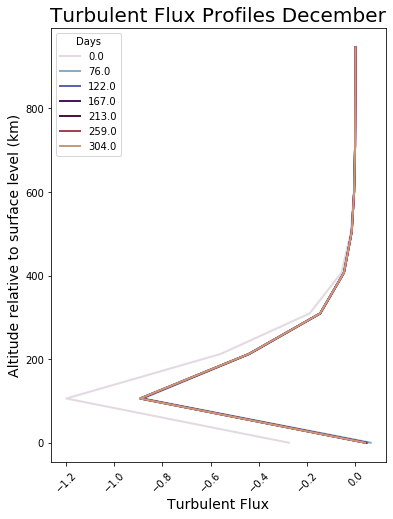

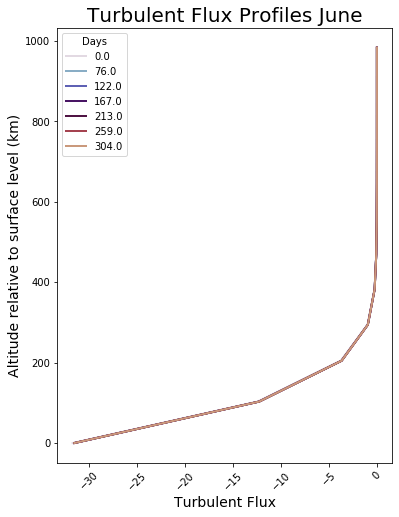

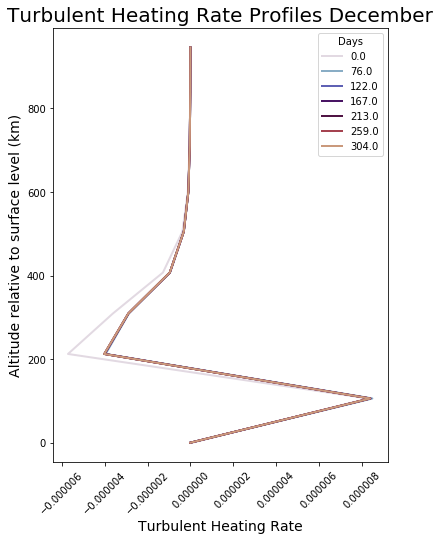

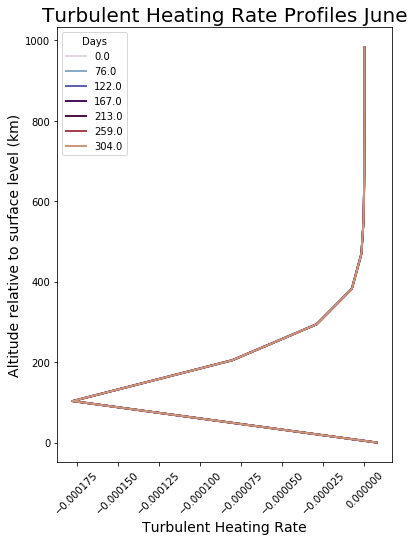

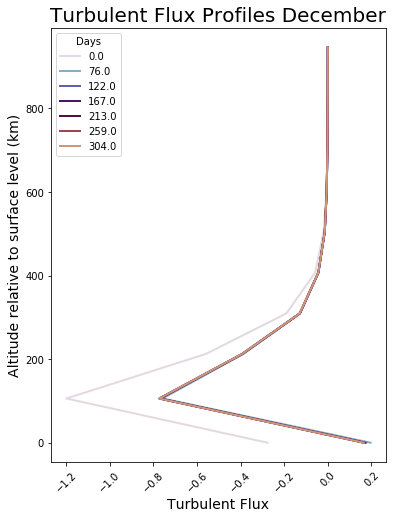

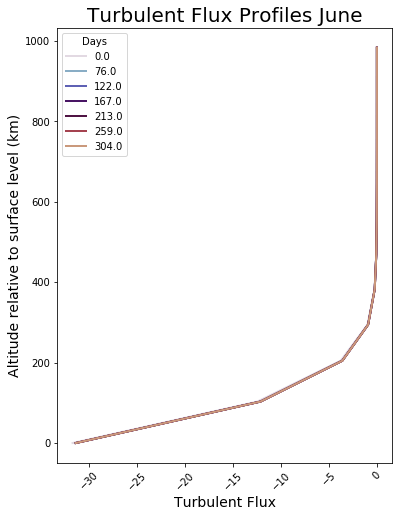

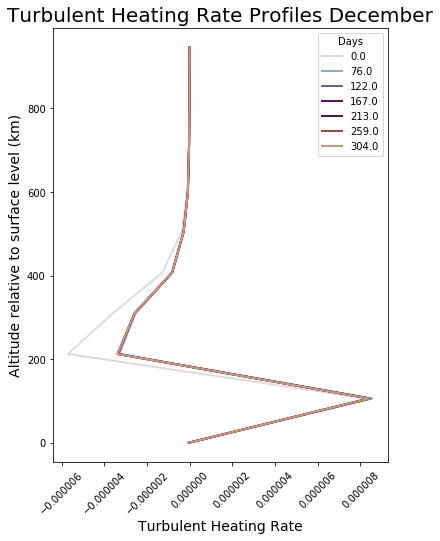

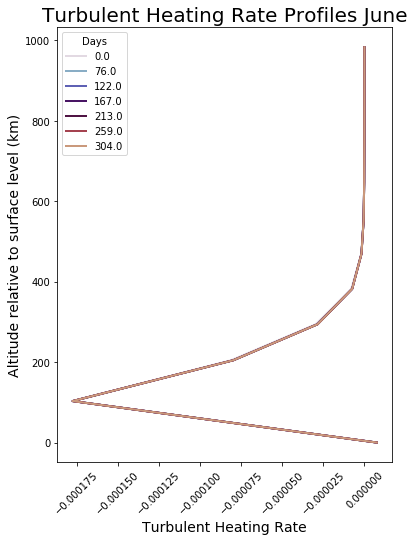

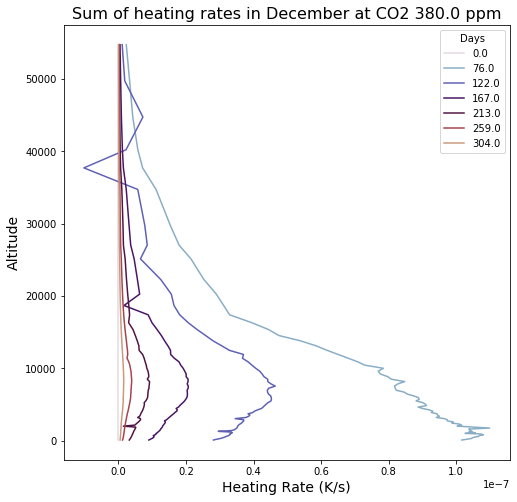

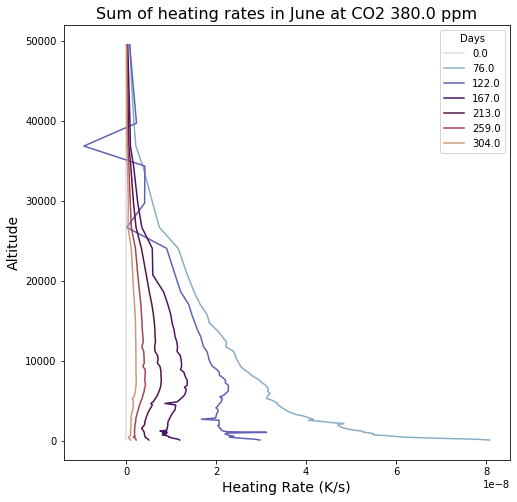

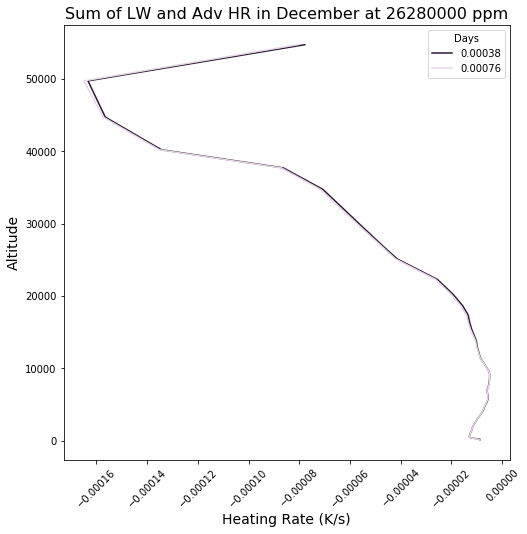

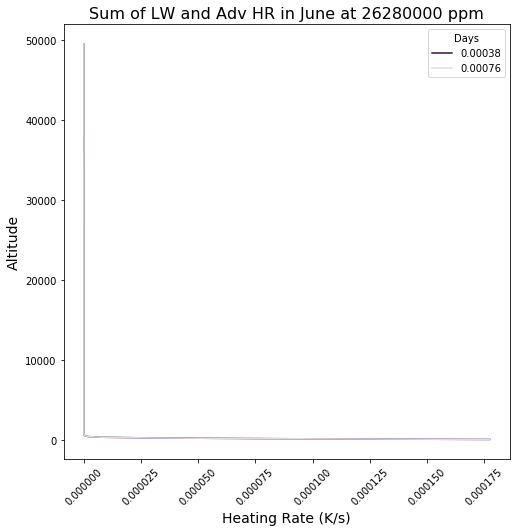

In [44]:

#### plot the turbulent flux and turbulent heating rates (surface and atmosphere)
for CO2 in [.00038, .00076]:
    for month in [month1,month2]:
        plotting.plot_turbulent_flux(ds, results_dict, month, CO2, [time1, time2, time3, time4, time5, time6, time7], ylim = 1000)
    for month in [month1,month2]:  
        plotting.plot_turbulent_hr(ds, results_dict, month, CO2, [time1, time2, time3, time4, time5, time6, time7], ylim = 1000)
#### plot the total heating rate over time
for month in [month1,month2]:
    plotting.plot_sum_hr(results_dict, month, .00038,[time1, time2, time3, time4, time5, time6, time7])
#### plot just the advection and LW heating rates
for month in [month1,month2]:
    plotting.plot_adv_LW_hr(results_dict, month, .00038, .00076, time7, diff_only =False)

### find entire column energy balance

In [49]:
#time we're looking at
time = time7
month = month2
#TOA Frad
F_rad_toa = np.asarray(results_dict[time]['OLR'][CO2_conc1][month]) - np.asarray(results_dict[time]['ASR'][CO2_conc1][month]) #W/m2

#Surface Frad
F_rad_sfc = np.asarray(results_dict[time]['LW_sfc_clr'][CO2_conc1][month]) - np.asarray(results_dict[time]['SW_sfc_clr'][CO2_conc1][month]) #W/m2

#Surface Fturb
F_turb_sfc = np.asarray(results_dict[time]['sfc_turbulent_flux'][CO2_conc1][month]) #W/m2

#dT/dt
total_atm_hr = ((np.asarray(results_dict[time7]['Tatm'][CO2_conc1][month]) - 
                np.asarray(results_dict[time7 - timestep]['Tatm'][CO2_conc1][month]))/np.asarray(timestep)) #K/s

#dz
delta_z = np.diff(results_dict[time]['z_bounds'][CO2_conc1][month]) #surface to atmosphere #m

#heat capacity (density*cp)
R = 8.314 #J/mol/K
MW_air = 0.0289647 #kg/mol
pressure_TOA = 100*ram_dict[CO2_conc1][month].lev[-1] #pascal (kg/m/s2)
density_atm = (MW_air*100*ram_dict[CO2_conc1][month].lev)/(np.asarray(results_dict[time]['Tatm'][CO2_conc1][month]) * R) #kg/m^3
density_ice = 900 #kg/m^3
cp_ice = 2060 #specific heat of ice J/kg/K
cp_air = 1003 #specific heat of air (at 250 K) J/(kg*K)
heat_capacity_atm = density_atm*cp_air

#atmospheric heat content rate at each level
total_atm_heat_content_rate = total_atm_hr * heat_capacity_atm * delta_z #W/m2

#advective flux at each level
total_adv_flux = np.asarray(results_dict[time]['advection_Tatm'][CO2_conc1][month]) * heat_capacity_atm * delta_z #W/m2

In [50]:
energy_budget = {}
energy_budget[month] = F_rad_toa - F_rad_sfc - F_turb_sfc - total_atm_heat_content_rate.sum() + total_adv_flux.sum()
print('W/m^2: ',
     '\nTOA Radiative Flux ' + str(F_rad_toa), 
      '\nSFC Radiative Flux ' + str(F_rad_sfc), 
      '\nSFC Turbulent Flux ' + str(F_turb_sfc), 
      '\nAtmospheric heat content flux ' + str(total_atm_heat_content_rate.sum()),
      '\nAtmospheric advective flux ' + str(total_adv_flux.sum()),
     '\nEnergy Budget ' +str(energy_budget))



W/m^2:  
TOA Radiative Flux [117.30393088] 
SFC Radiative Flux [31.52868371] 
SFC Turbulent Flux -31.53303978429076 
Atmospheric heat content flux -0.01068156616771039 
Atmospheric advective flux -118.67049784968727 
Energy Budget {'June': array([-1.35152933])}


#### calculate total surface heating rate

In [51]:
heat_capacity_sfc = climlab.utils.heat_capacity.ocean(1)
rad_sfc_HR = {}
for time in results_dict.keys():
    rad_sfc_HR[time] = {}
    for CO2_conc in results_dict[0]['turb_sfc_hr'].keys():
        rad_sfc_HR[time][CO2_conc] = {}
        for month in results_dict[0]['turb_sfc_hr'][0.00038].keys():
            rad_sfc_HR[time][CO2_conc][month] = {}
            F_rad_sfc = np.asarray(results_dict[time]['LW_sfc_clr'][CO2_conc][month]) - np.asarray(results_dict[time]['SW_sfc_clr'][CO2_conc][month]) #W/m2
            rad_sfc_HR[time][CO2_conc][month] = F_rad_sfc / heat_capacity_sfc

#### solar insolation

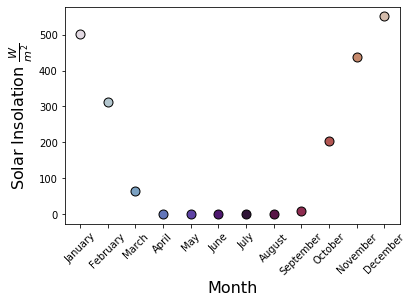

In [129]:
###plot solar insolation by month

fig, ax = plt.subplots(figsize = [6,4])
color=iter(cm.twilight(np.linspace(0,1,13)))

for m in np.array(ds['month']):
    c=next(color)
    plt.plot(m, ram_dict[.00038][m].subprocess.Radiation.insolation, 'o', c = c, mec ='k',ms = 9)
    plt.xticks(rotation = 45)
    plt.xlabel('Month', fontsize = 16)
    plt.ylabel(r'Solar Insolation $\frac{W}{m^2}$', fontsize = 16)
plt.savefig('../figures/solar_insol.png', bbox_inches = 'tight', dpi = 150)

#### absorption coefficients and pressure

In [215]:
# estimate the absorption coefficient for CO2 = 1e-4 m2/kg
# P*CO2 mixing ratio * absorption coefficient / g = 1
# so g/CO2 mixing ratio /absorption coefficient = P

g = 9.8 #m/s2
mmr = 200*1e-6#ppm
abs_coef = 1

P = g/(mmr*abs_coef) #kg*s2/ m
P/100

490.00000000000006

In [207]:
wl = 15 #um
wn = 1/wl * 1e4
wn

666.6666666666666

#### standard atmosphere vs antarctic

In [259]:
#### compare between our antarctic version and a normal atmosphere
alb = 0.25
#  State variables (Air and surface temperature)
state = climlab.column_state(num_lev=30)
#  Parent model process
rcm = climlab.TimeDependentProcess(state=state)
#  Fixed relative humidity
h2o = climlab.radiation.ManabeWaterVapor(state=state)
#  Couple water vapor to radiation
rad = climlab.radiation.RRTMG(state=state, specific_humidity=h2o.q, albedo=alb)
#  Convective adjustment
conv = climlab.convection.ConvectiveAdjustment(state=state, adj_lapse_rate=6.5)
#  Couple everything together
rcm.add_subprocess('Radiation', rad)
rcm.add_subprocess('WaterVapor', h2o)
rcm.add_subprocess('Convection', conv)
#  Run the model
rcm.integrate_years(1)


Opened data from /opt/anaconda3/envs/conda_env/lib/python3.7/site-packages/climlab/radiation/data/ozone/apeozone_cam3_5_54.nc
Integrating for 365 steps, 365.2422 days, or 1 years.
Total elapsed time is 0.9993368783782377 years.


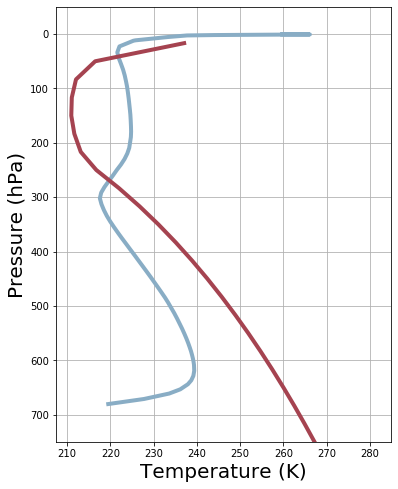

In [263]:
fig, ax = plt.subplots(figsize = [6,8])
colors=cm.twilight(np.linspace(0,1,8))
for month in ['March']:
    #plot our antarctic atmosphere
    x = np.asarray(results_dict[0]['Tatm'][0.00038][month])
    y = results_dict[0]['lev'][0.00038][month]
    plt.plot(x, y, c = colors[1], lw = 4)
    
    #plot standard atmosphere
    plt.plot(rcm.state['Tatm'], rcm.lev, c= colors[5], lw = 4)
    
    #labels and lims
    plt.ylabel('Pressure (hPa)', fontsize = 20)
    plt.xlabel('Temperature (K)', fontsize = 20)
    plt.ylim([750,-50])
plt.grid()
plt.savefig('../figures/stp_antarctic_comp.png', dpi = 150, bbox_inches = 'tight')